In [1]:
#CASE STUDY: Analysis Of SuperStore
#load librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Understanding the data

In [3]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.drop(columns="Postal Code", inplace=True)

Types of values in each columns

In [35]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [36]:
print(df["State"].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


Statistical Analysis

In [7]:
#statistical describe of the data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


checking for the null values in a data

In [39]:
df.isnull().sum()

Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Profit Margin    0
dtype: int64

In [27]:
# shown the number of unique values in categorical data
for feature in df.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287
Profit Margin : 572


Checking for Duplicate values in data

In [40]:
df.duplicated().sum()

17

Visualization of missing values

<AxesSubplot: >

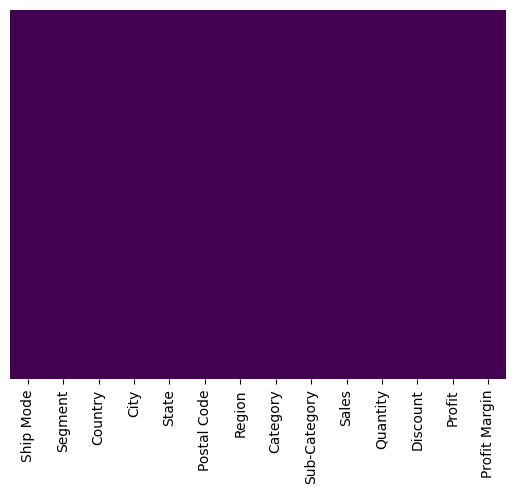

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Dropping of duplicate values

In [42]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,0.1625
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,0.1700
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.0750
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,0.4500


Counts of values in each columns

In [21]:
df.Segment.value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [23]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [29]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Number of Products in each Subcategory

In [31]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Visualization of data

Bar Plot Between Region and Sales

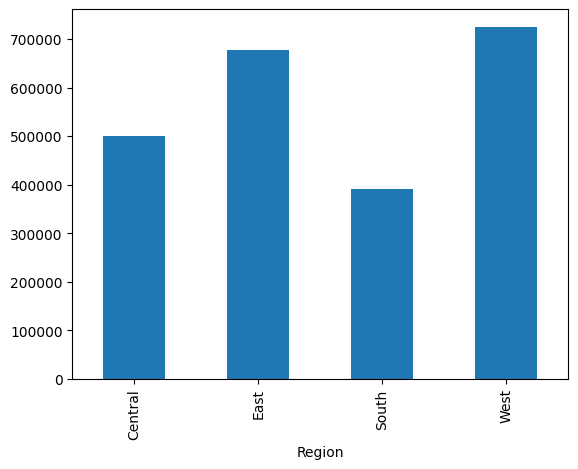

In [44]:
#sales analysis based on region
df.groupby("Region")["Sales"].sum().plot.bar()
ylabel='Sales'

<AxesSubplot: xlabel='Region'>

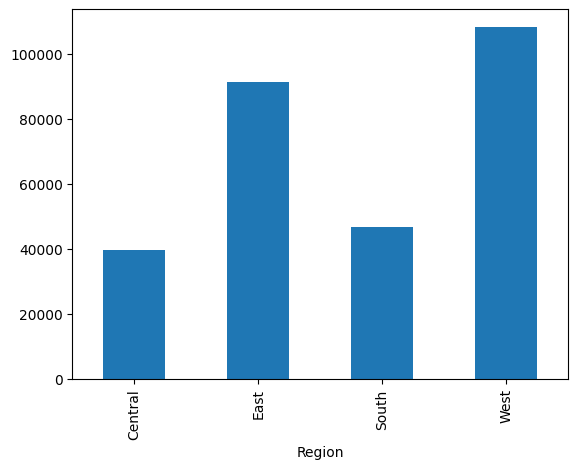

In [11]:
df.groupby("Region")["Profit"].sum().plot.bar()

Pie chart of Sub-Category

<AxesSubplot: ylabel='Sub-Category'>

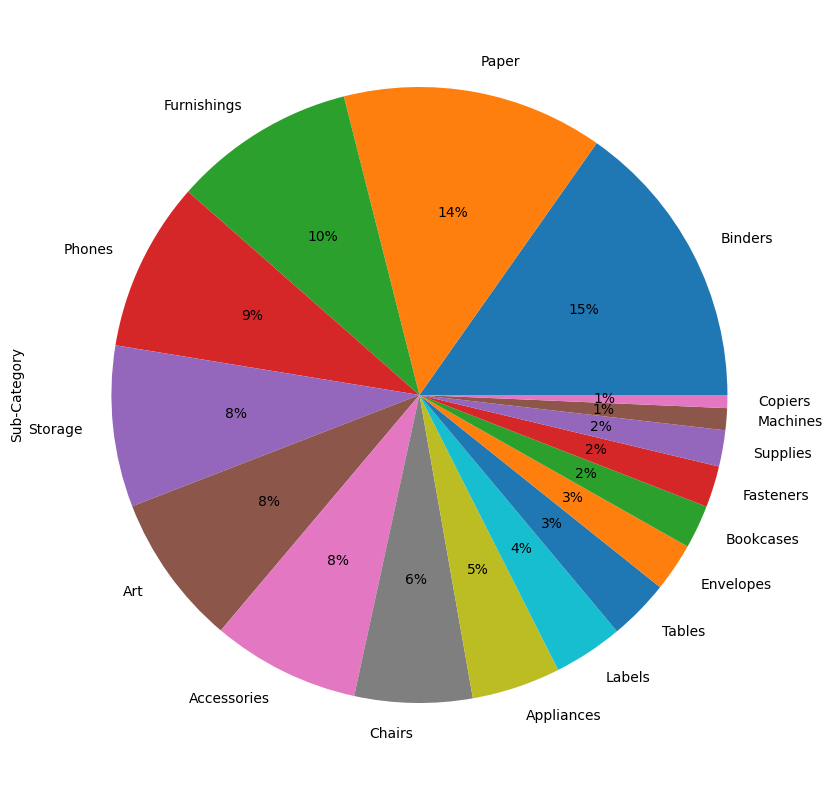

In [48]:
plt.figure(figsize=(12,10))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Sales'>

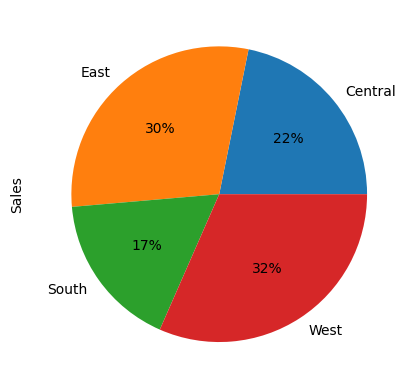

In [12]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Profit'>

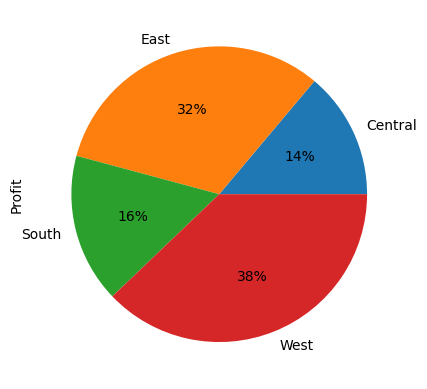

In [13]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: xlabel='Segment'>

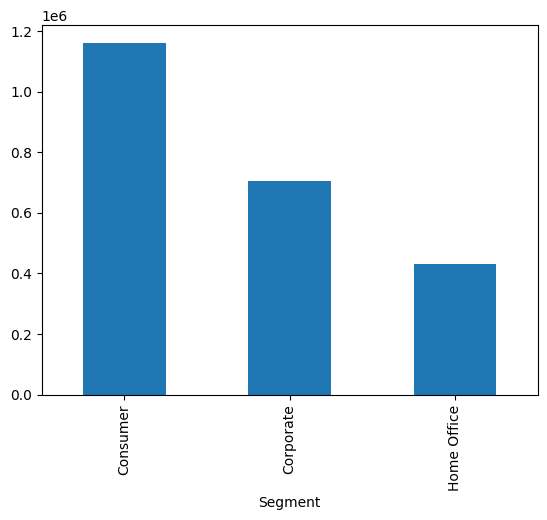

In [14]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Segment'>

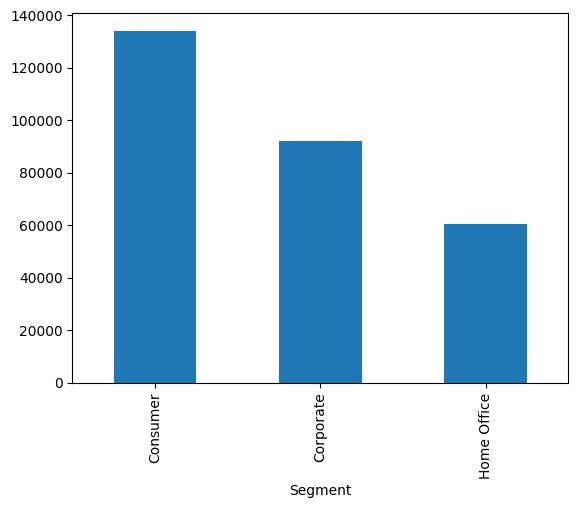

In [15]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<AxesSubplot: xlabel='Category'>

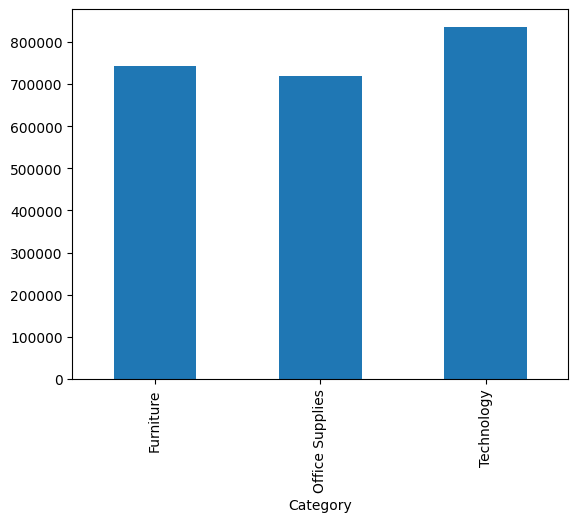

In [16]:
df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Category'>

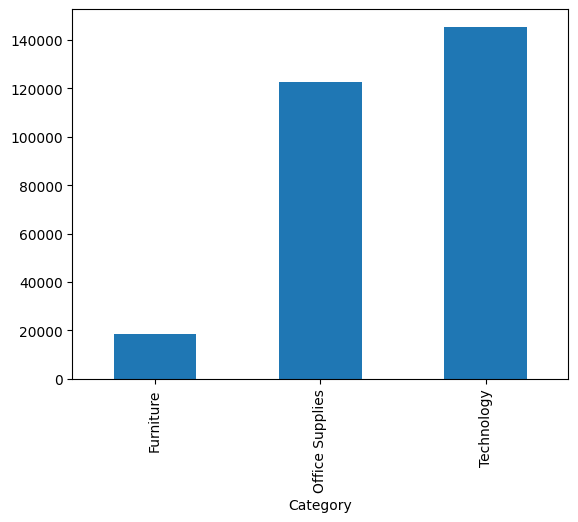

In [17]:
df.groupby("Category")["Profit"].sum().plot.bar()

<AxesSubplot: ylabel='Sales'>

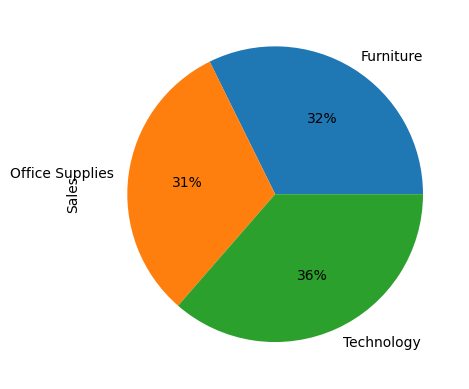

In [18]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Profit'>

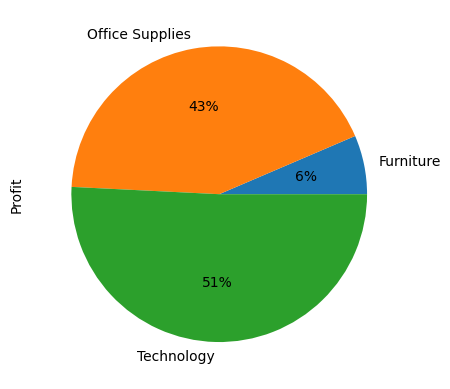

In [19]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: xlabel='State'>

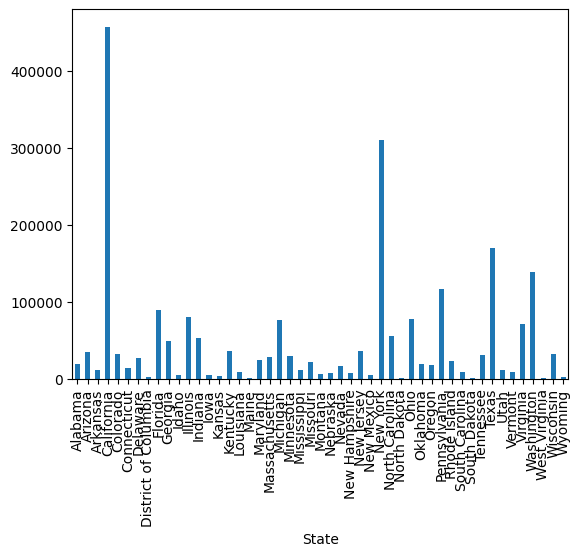

In [20]:
df.groupby("State")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='State'>

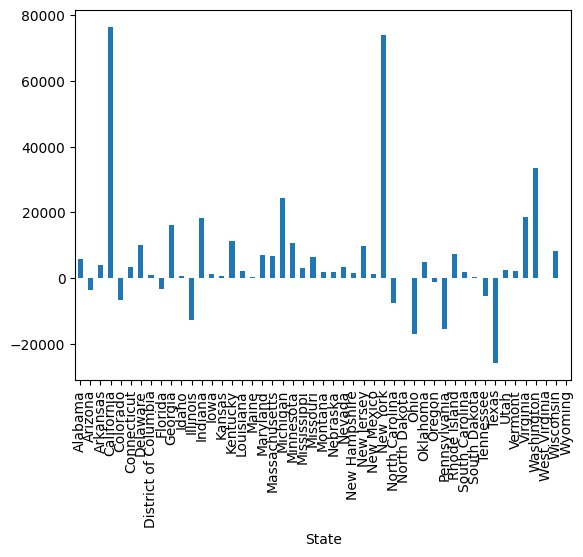

In [21]:
df.groupby("State")["Profit"].sum().plot.bar()

Top selling products in the superstore.

In [7]:
product_group = df.groupby(["Category"]).sum()["Sales"]
product_group.head()

C:\Users\CSE\AppData\Local\Temp\ipykernel_11928\2758644642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby(["Category"]).sum()["Sales"]


Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [8]:
top_selling_products = product_group.sort_values(ascending=False)
top_selling_products = pd.DataFrame(top_selling_products.head())
top_selling_products

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


Plotting the top sellings products in Superstore.

Text(0, 0.5, 'Total Profit')

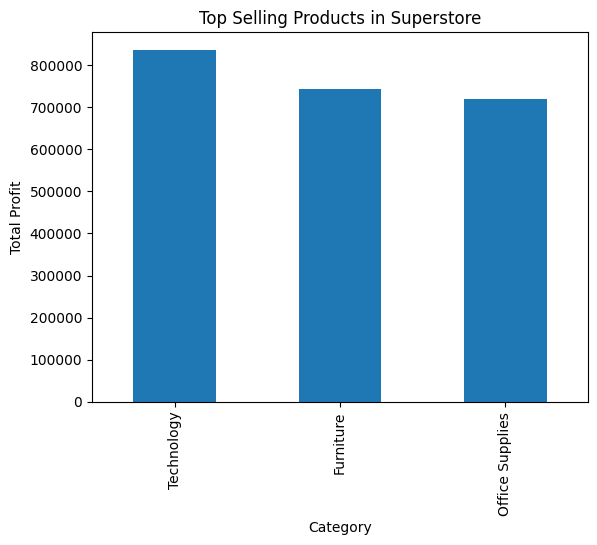

In [11]:
top_selling_products.plot(kind="bar")

# Add a title to the plot
plt.title("Top Selling Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()

C:\Users\CSE\AppData\Local\Temp\ipykernel_11928\1219229358.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]


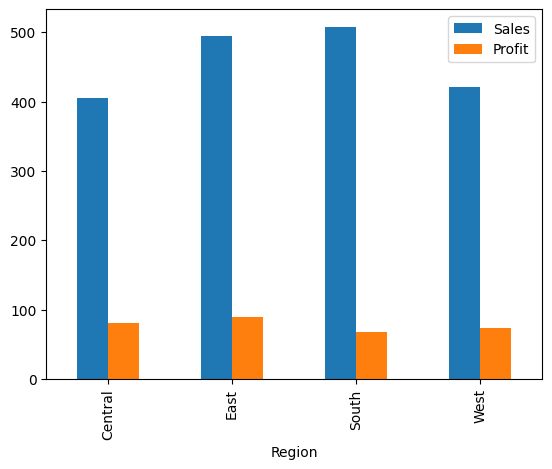

In [15]:
product = df[df["Category"] == "Technology"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

Averages of data

C:\Users\CSE\AppData\Local\Temp\ipykernel_11928\2824446728.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]


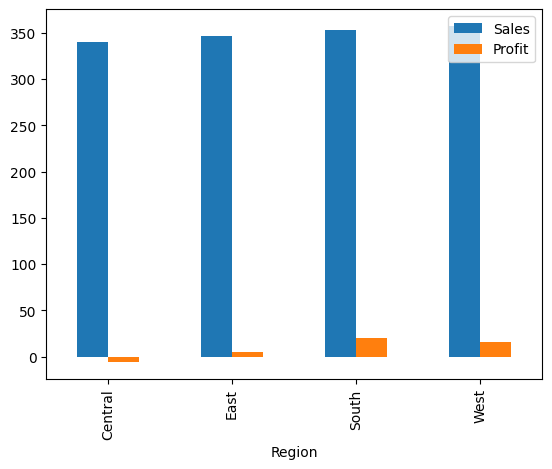

In [16]:
product = df[df["Category"] == "Furniture"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

C:\Users\CSE\AppData\Local\Temp\ipykernel_11928\3574022250.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]


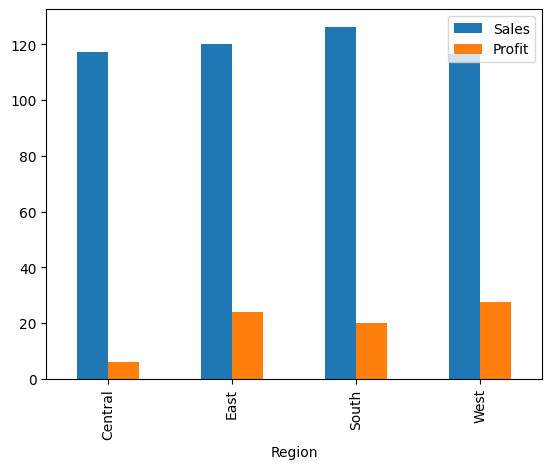

In [17]:
product = df[df["Category"] == "Office Supplies"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

Slicing Data

In [18]:
product = df[(df["Category"] == "Technology") & (df["Region"] == "Central")]
product

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737
40,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Technology,Phones,371.168,4,0.2,41.7564
41,Standard Class,Corporate,United States,Naperville,Illinois,60540,Central,Technology,Phones,147.168,4,0.2,16.5564
44,First Class,Corporate,United States,Eagan,Minnesota,55122,Central,Technology,Accessories,45.980,2,0.0,19.7714
86,Standard Class,Consumer,United States,Rochester,Minnesota,55901,Central,Technology,Accessories,19.990,1,0.0,6.7966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,Standard Class,Consumer,United States,Carrollton,Texas,75007,Central,Technology,Accessories,127.984,2,0.2,25.5968
9922,Standard Class,Consumer,United States,Chicago,Illinois,60653,Central,Technology,Accessories,191.968,4,0.2,28.7952
9949,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,83.970,3,0.0,15.9543
9950,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,39.890,1,0.0,14.7593


In [19]:
avg_profit_margin_by_category = df.groupby('Category')['Profit'].sum()

print(avg_profit_margin_by_category)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


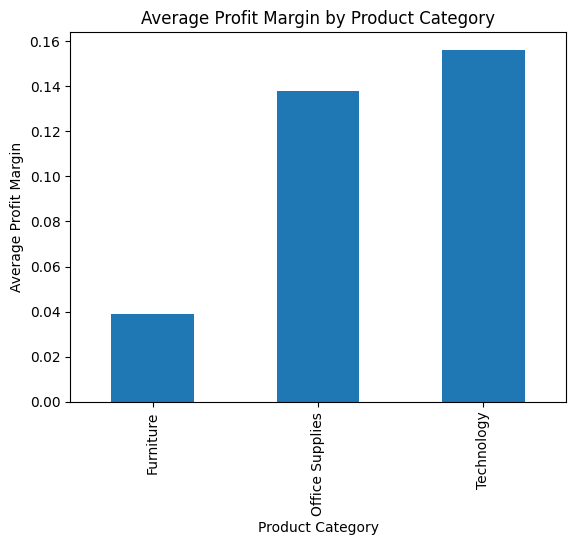

In [20]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean()

# Plot the average profit margin for each category as a bar chart
avg_profit_margin_by_category.plot(kind='bar')

# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()

Pivot Table for the Data

In [22]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


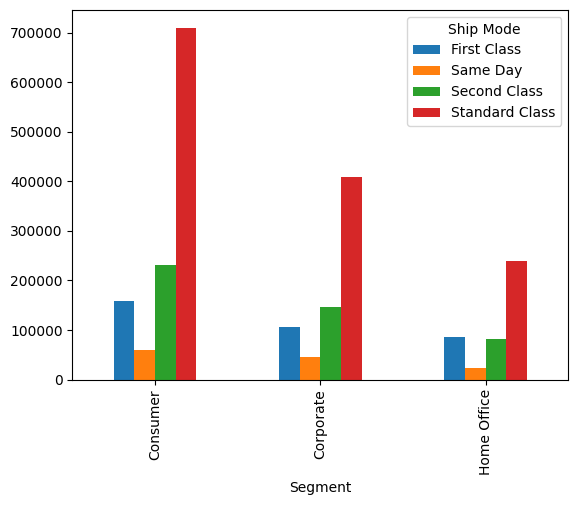

In [24]:
# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)
plt.show()

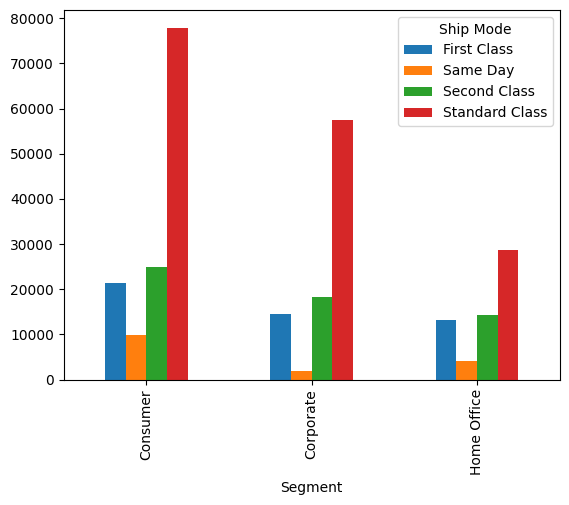

In [25]:
#profit
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=False)

# Show the plot
plt.show()

Count plot of Sub-Categories

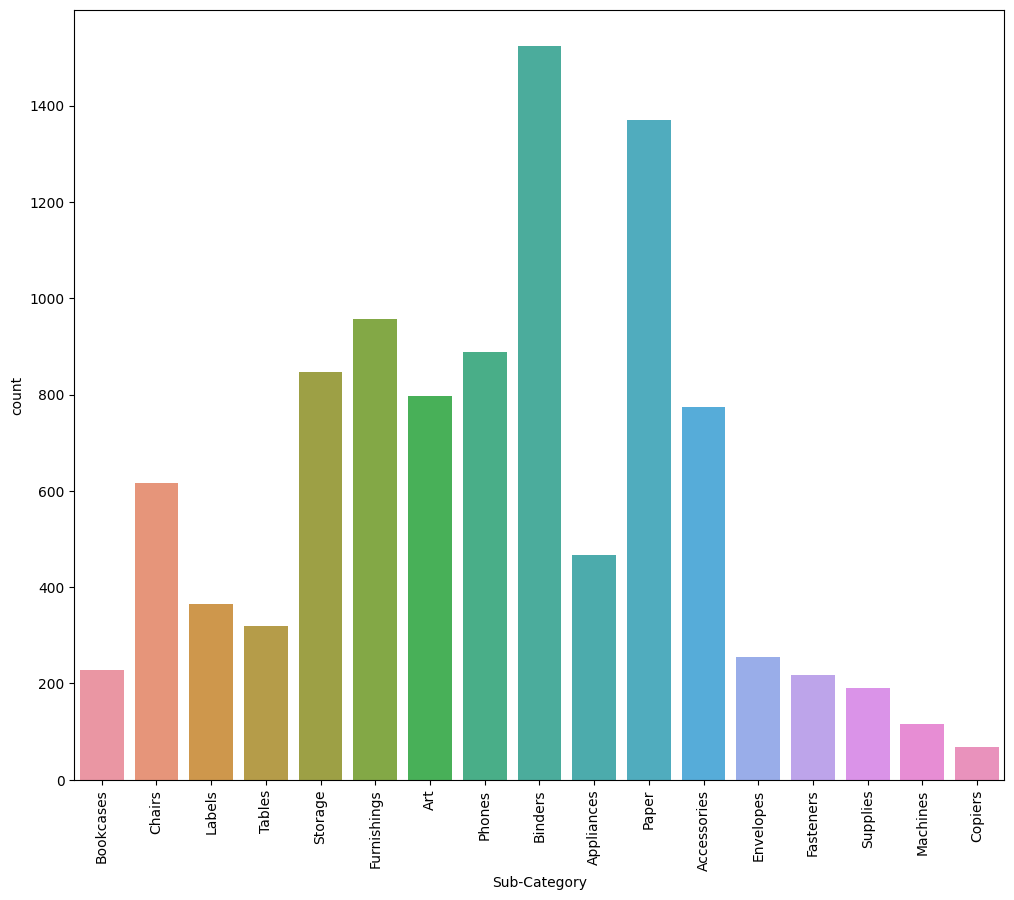

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(x=df["Sub-Category"])
plt.xticks(rotation=90)
plt.show()

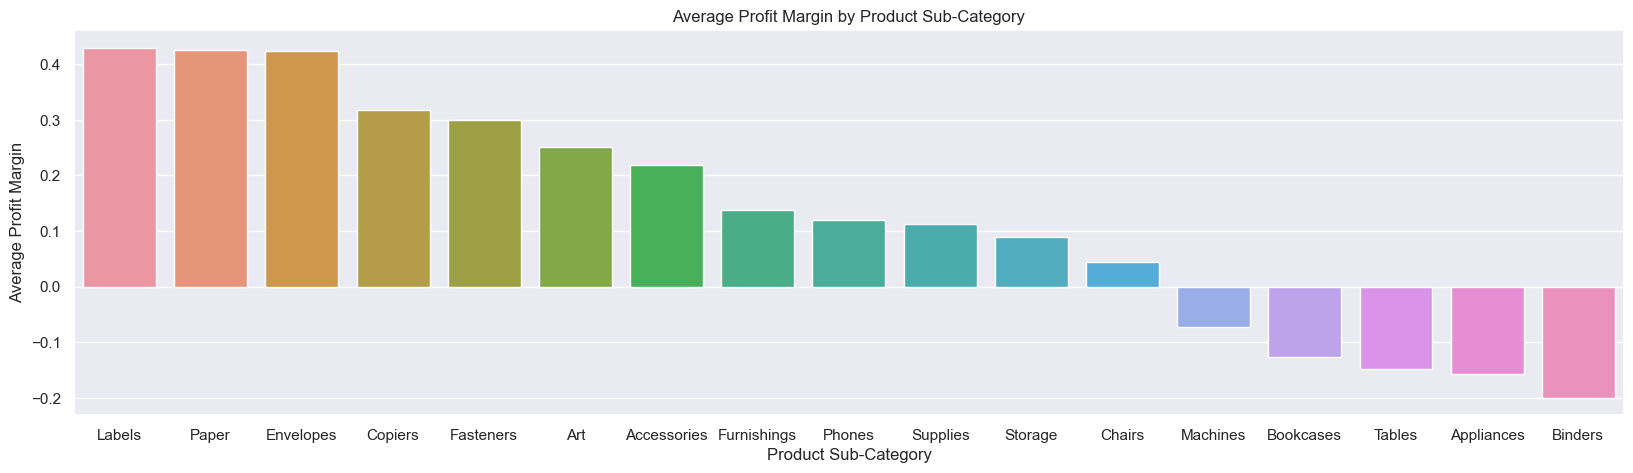

In [6]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product sub-category and calculate the average profit margin for each sub-category
avg_profit_margin_by_category = df.groupby(['Sub-Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Sub-Category',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Sub-Category")
plt.xlabel("Product Sub-Category")
plt.ylabel("Average Profit Margin")

plt.show()

Histogram of data

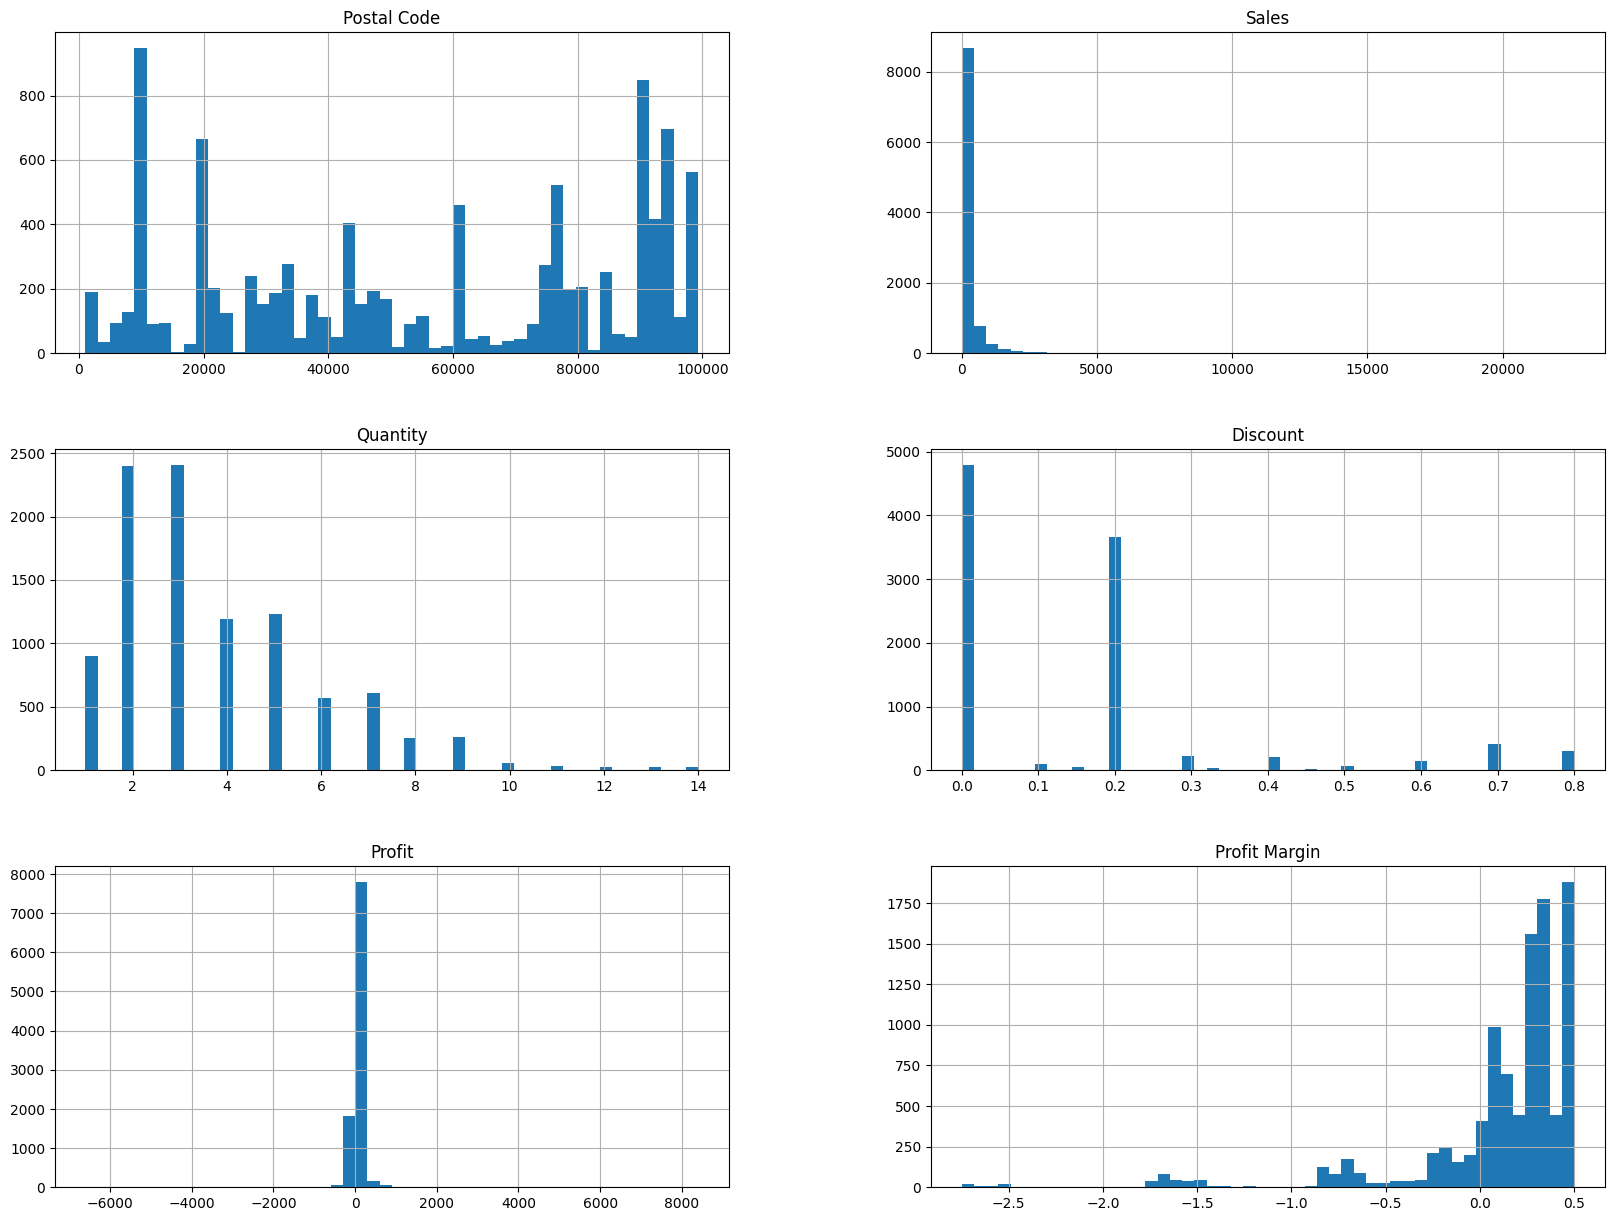

In [54]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Summary of data

In [43]:
df.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit     Profit Margin
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     0.35            2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370    -1.75            2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     0.45            2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312     0.48            2
Same Day        Home Office  United States  San Francisco  California  94122        West  